In [1]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rc('pdf', fonttype=42)

datadir = '../datasets/pmlb/datasets/'
frames = []
for f in glob(datadir+'/*/*.tsv.gz'):
    df = pd.read_csv(f,sep='\t') 
    group = 'feynman' if 'feynman' in f else 'strogatz' if 'strogatz' in f else 'black-box'
    frames.append(dict(
        name=f.split('/')[-1][:-7],
        nsamples = df.shape[0],
        nfeatures = df.shape[1],
        npoints = df.shape[0]*df.shape[1],
        Group=group
    ))
    
df = pd.DataFrame.from_records(frames)

df.loc[:,'friedman_dataset'] = np.where(df['name'].str.contains('_fri_'), "Friedman", "Non-Friedman")

df = df.sort_values(by=['friedman_dataset'], ascending=False)

df

,name,nsamples,nfeatures,npoints,Group,friedman_dataset
0,allrep,3772,30,113160,black-box,Non-Friedman
251,pendigits,10992,17,186864,black-box,Non-Friedman
278,feynman_I_43_31,100000,4,400000,feynman,Non-Friedman
277,feynman_II_11_28,100000,3,300000,feynman,Non-Friedman
274,tic_tac_toe,958,10,9580,black-box,Non-Friedman
...,...,...,...,...,...,...
246,615_fri_c4_250_10,250,11,2750,black-box,Friedman
351,650_fri_c0_500_50,500,51,25500,black-box,Friedman
349,586_fri_c3_1000_25,1000,26,26000,black-box,Friedman
62,620_fri_c1_1000_25,1000,26,26000,black-box,Friedman


In [2]:
print((df[df['Group']=='black-box'])['name'])
(df[df['Group']=='black-box'])['friedman_dataset'].value_counts()

0                  allrep
251             pendigits
274           tic_tac_toe
270               texture
269                corral
              ...        
246     615_fri_c4_250_10
351     650_fri_c0_500_50
349    586_fri_c3_1000_25
62     620_fri_c1_1000_25
152      649_fri_c0_500_5
Name: name, Length: 286, dtype: object


Non-Friedman    224
Friedman         62
Name: friedman_dataset, dtype: int64

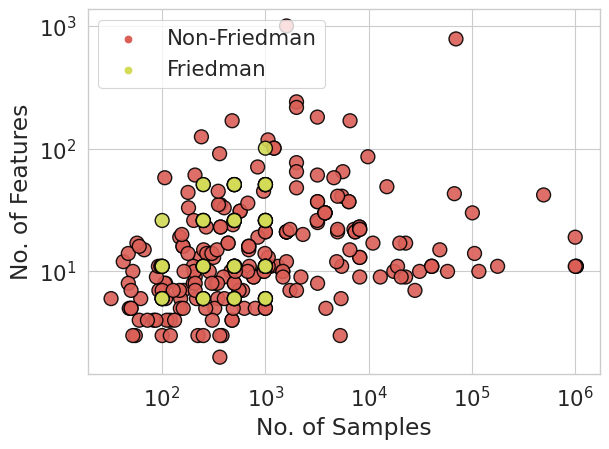

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette='hls')
sns.set_context("paper", font_scale=1.75, rc={"lines.linewidth": 1.5})
sns.despine(left=True, bottom=True)

## PMLB dataset sizes
g = sns.scatterplot(
    data=df[df['Group']=='black-box'],
    x='nsamples',
    y='nfeatures',
    hue='friedman_dataset',
    alpha=0.9,
    linewidth=1.,
    edgecolor='k',
    s=100, 
)
ax = plt.gca()
plt.legend(loc='upper left')
ax.set_xscale('log')
ax.set_yscale('log')
plt.xlabel('No. of Samples')
plt.ylabel('No. of Features')
plt.tight_layout()
plt.savefig('figs/pmlb_size.pdf',dpi=400, bbox_inches='tight')